In [3]:
from preprocessing import DataLoader
import os
import pandas as pd

base_path = os.path.dirname(os.getcwd()) 
loader = DataLoader(base_path)
loader.load_all_data()

In [4]:
# Expressions-Daten
exprs_data = loader.exprs_data

# Originale pData
pdata_original = loader.pdata_original

# Imputierte pData
pdata_imputed = loader.pdata_imputed

# All Genes Daten
all_genes_data = loader.all_genes_data

# Common Genes Daten
common_genes_data = loader.common_genes_data

# Intersection Daten
intersection_data = loader.intersection_data

# Merged originale pData
merged_pdata_original = loader.merged_pdata_original

# Merged imputierte pData
merged_pdata_imputed = loader.merged_pdata_imputed

In [10]:
all_genes_data['all_genes.csv'].shape[1]

56722

In [3]:
exprs = loader.common_genes_data['common_genes_knn_imputed.csv']
pdata = loader.merged_pdata_imputed['merged_imputed_pData.csv']
survival_data = loader.merged_pdata_imputed['merged_imputed_pData.csv']

In [23]:
loader.all_genes_data




['all_genes.csv']

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000271598,ENSG00000285304,ENSG00000273804,ENSG00000255726,ENSG00000260482,ENSG00000270955,ENSG00000233437,ENSG00000259813,ENSG00000285446,ENSG00000288646
Atlanta_2014_Long.PT081,-3.006631,-0.622789,1.705887,0.234710,0.906281,-0.372955,-0.883206,-3.477133,-3.289121,-3.993471,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Atlanta_2014_Long.PT127,0.044560,-0.622789,0.520111,0.840715,0.440554,0.035672,-0.932726,0.353031,0.178056,0.307130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Atlanta_2014_Long.PT168,0.975390,-0.622789,0.104950,1.722182,-0.308974,-0.676291,-0.529297,0.471131,0.632298,0.411310,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Atlanta_2014_Long.PT184,0.744177,-0.622789,0.137887,0.569978,0.234893,-0.974835,0.080468,0.867739,-0.433796,0.727024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Atlanta_2014_Long.PT199,0.316196,-0.622789,0.595612,0.282694,-0.553280,-0.819195,0.212234,0.694016,0.235932,0.633217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Stockholm_2016_Ross_Adams.STKHLM8462,1.054221,-0.221158,0.914313,1.166952,-0.987476,-0.614258,-0.199152,0.936988,-0.093688,-0.421008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stockholm_2016_Ross_Adams.STKHLM8659,-0.376987,-0.595446,-0.413672,0.974346,0.512080,-0.778478,0.691598,-1.282891,0.338737,0.452078,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stockholm_2016_Ross_Adams.STKHLM9157,-0.096840,0.003729,-0.922901,-1.304991,0.077976,-1.057037,-1.738007,0.256888,0.718058,-0.361297,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stockholm_2016_Ross_Adams.STKHLM9161,-0.084071,-0.351288,-0.234087,-0.616688,-0.300022,-1.405359,-1.521836,0.442135,2.133783,0.010330,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
from preprocessing import DataLoader
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sksurv.linear_model import CoxnetSurvivalAnalysis
from sksurv.util import Surv
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
from sksurv.ensemble import RandomSurvivalForest, GradientBoostingSurvivalAnalysis, ComponentwiseGradientBoostingSurvivalAnalysis
from sklearn.ensemble import RandomForestClassifier
from sksurv.metrics import concordance_index_censored
import xgboost as xgb
import torch
import torch.nn as nn
import warnings
warnings.filterwarnings('ignore')



#### Gradient Boosting
performed better with merged data than with intersection


Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] END gb__learning_rate=0.01, gb__max_depth=3, gb__max_features=sqrt, gb__min_samples_leaf=3, gb__min_samples_split=5, gb__n_estimators=500, gb__subsample=0.8; total time=   7.4s
[CV] END gb__learning_rate=0.01, gb__max_depth=3, gb__max_features=sqrt, gb__min_samples_leaf=3, gb__min_samples_split=5, gb__n_estimators=500, gb__subsample=0.8; total time=   7.4s
[CV] END gb__learning_rate=0.01, gb__max_depth=3, gb__max_features=sqrt, gb__min_samples_leaf=3, gb__min_samples_split=5, gb__n_estimators=500, gb__subsample=0.8; total time=   7.5s
[CV] END gb__learning_rate=0.01, gb__max_depth=3, gb__max_features=sqrt, gb__min_samples_leaf=3, gb__min_samples_split=5, gb__n_estimators=500, gb__subsample=0.8; total time=   7.5s
[CV] END gb__learning_rate=0.01, gb__max_depth=3, gb__max_features=sqrt, gb__min_samples_leaf=3, gb__min_samples_split=5, gb__n_estimators=500, gb__subsample=0.8; total time=   7.5s
[CV] END gb__learning_rate=

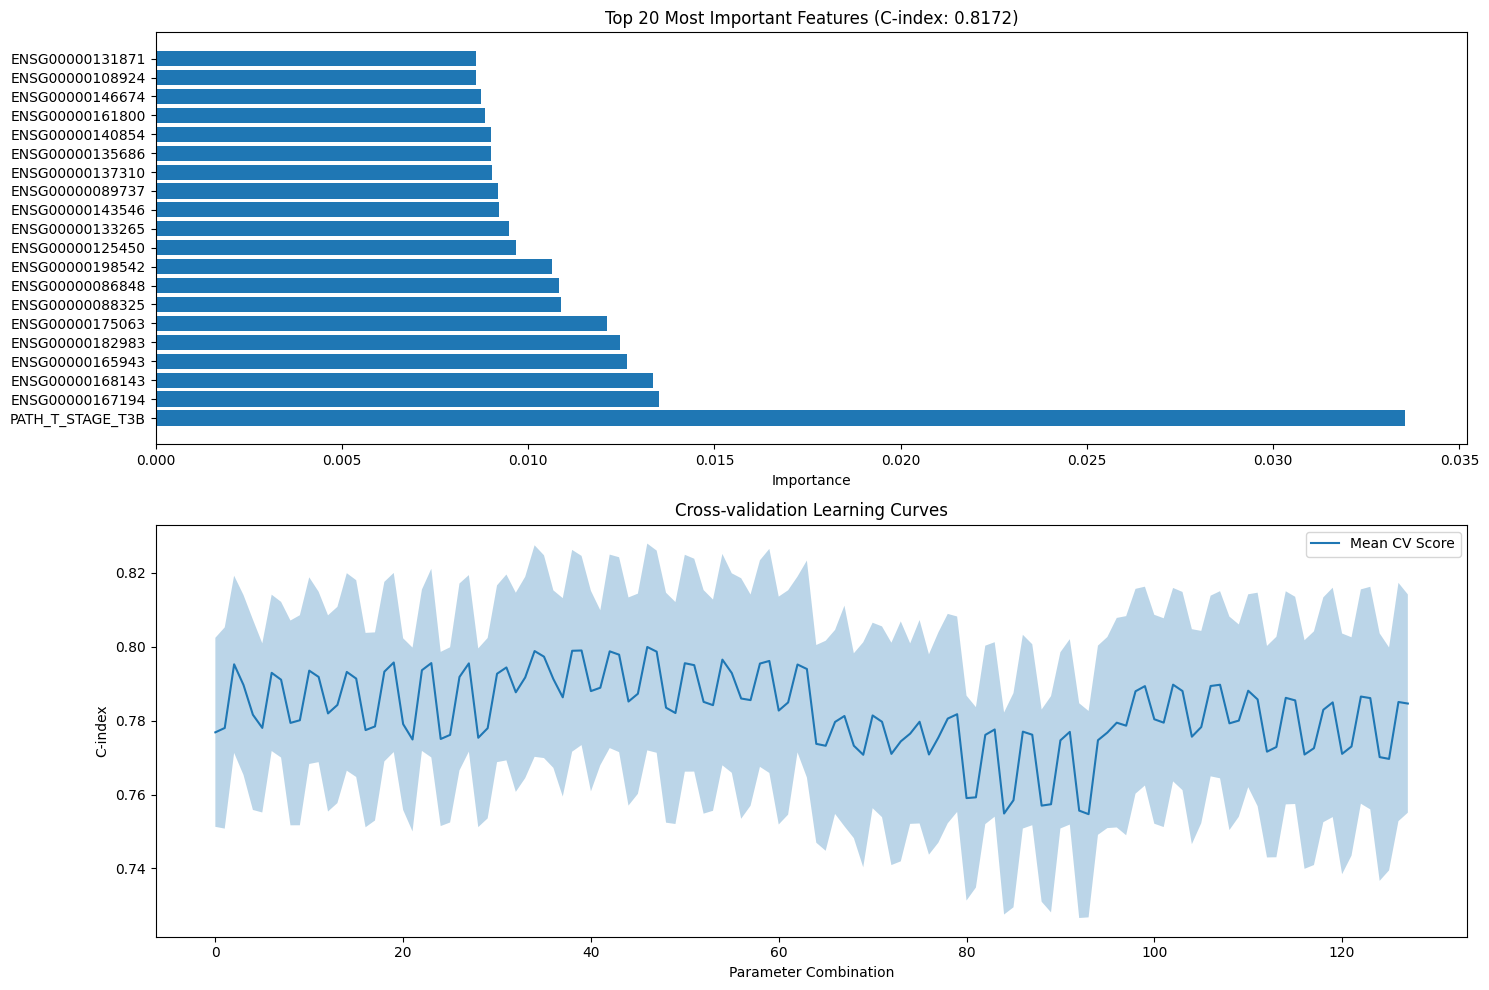

In [55]:


def prepare_clinical_features(pdata):
    """
    Enhanced clinical feature preparation
    """
    # Add more potentially relevant clinical features
    clinical_features = [
        'GLEASON_SCORE',
        'PATH_T_STAGE', 'CLIN_T_STAGE', 
        'PRE_OPERATIVE_PSA', 'AGE'
    ]
    
    clinical_data = pdata[clinical_features].copy()
    
    # Enhanced categorical handling
    categorical_features = ['PATH_T_STAGE', 'CLIN_T_STAGE']
    clinical_data = pd.get_dummies(
        clinical_data, 
        columns=categorical_features, 
        drop_first=True,
        prefix=categorical_features
    )
    
    # More sophisticated missing value imputation
    numerical_columns = ['GLEASON_SCORE', 
                        'PRE_OPERATIVE_PSA', 'AGE']
    
    # Use different strategies for different types of missing values
    for col in numerical_columns:
        if col in ['GLEASON_SCORE']:
            clinical_data[col] = clinical_data[col].fillna(clinical_data[col].mode()[0])
        else:
            clinical_data[col] = clinical_data[col].fillna(clinical_data[col].median())
    
    # Add interaction terms for important clinical features
    clinical_data['GLEASON_PSA_INTERACTION'] = clinical_data['GLEASON_SCORE'] * clinical_data['PRE_OPERATIVE_PSA']
    
    return clinical_data

def select_important_genes(exprs_data, y, n_features=1000):
    """
    Pre-select important genetic features
    """
    selector = SelectFromModel(
        GradientBoostingSurvivalAnalysis(
            n_estimators=500,
            learning_rate=0.01,
            max_depth=3
        ),
        max_features=n_features
    )
    selector.fit(exprs_data, y)
    return selector.transform(exprs_data), selector.get_feature_names_out()

def run_boosting_comparison_with_clinical(exprs_data, pdata, survival_data):
    """
    Enhanced gradient boosting with extensive tuning
    """
    # Prepare clinical features
    clinical_data = prepare_clinical_features(pdata)
    
    # Create survival array
    y = np.array([(status, time) for status, time in 
                  zip(survival_data['BCR_STATUS'], survival_data['MONTH_TO_BCR'])],
                 dtype=[('status', bool), ('time', float)])
    
    # Pre-select important genes
    selected_exprs, selected_genes = select_important_genes(exprs_data, y)
    
    # Combine features
    combined_features = pd.concat([
        pd.DataFrame(selected_exprs, index=exprs_data.index, columns=selected_genes),
        clinical_data
    ], axis=1)
    
    # Create cross-validation strategy
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Create pipeline
    pipeline = Pipeline([
        ('scaler', RobustScaler()),
        ('gb', GradientBoostingSurvivalAnalysis())
    ])
    
    # Define parameter grid
    param_grid = {
        'gb__n_estimators': [500, 1000],
        'gb__learning_rate': [0.01, 0.005],
        'gb__max_depth': [3, 5],
        'gb__min_samples_split': [5, 10],
        'gb__min_samples_leaf': [3, 5],
        'gb__subsample': [0.8, 0.8],
        'gb__max_features': ['sqrt', None]
    }
    
    # Perform grid search
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=cv,
        scoring=lambda estimator, X, y: concordance_index_censored(
            y['status'],
            y['time'],
            estimator.predict(X)
        )[0],
        n_jobs=-1,  # Use all available cores
        verbose=2
    )
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        combined_features, y, test_size=0.2, random_state=42, stratify=y['status']
    )
    
    # Fit grid search
    grid_search.fit(X_train, y_train)
    
    # Get best model
    best_model = grid_search.best_estimator_
    
    # Get predictions
    pred_risk = best_model.predict(X_test)
    c_index = concordance_index_censored(y_test['status'], y_test['time'], pred_risk)[0]
    
    # Get feature importance
    feature_importance = pd.DataFrame({
        'feature': combined_features.columns,
        'importance': best_model.named_steps['gb'].feature_importances_
    }).sort_values('importance', ascending=False)
    
    # Print detailed results
    print("\nBest parameters:", grid_search.best_params_)
    print("\nCross-validation results:")
    cv_results = pd.DataFrame(grid_search.cv_results_)
    print(cv_results[['params', 'mean_test_score', 'std_test_score']])
    
    return best_model, c_index, feature_importance, grid_search

# Run with enhanced monitoring
model, c_index, feature_importance, grid_search = run_boosting_comparison_with_clinical(
    exprs, pdata, survival_data
)

# Enhanced visualization
def plot_detailed_results(feature_importance, grid_search, c_index):
    plt.figure(figsize=(15, 10))
    
    # Feature importance plot
    plt.subplot(2, 1, 1)
    top_features = feature_importance.head(20)
    plt.barh(top_features['feature'], top_features['importance'])
    plt.title(f'Top 20 Most Important Features (C-index: {c_index:.4f})')
    plt.xlabel('Importance')
    
    # Learning curves
    plt.subplot(2, 1, 2)
    cv_results = pd.DataFrame(grid_search.cv_results_)
    plt.plot(cv_results['mean_test_score'], label='Mean CV Score')
    plt.fill_between(
        range(len(cv_results)),
        cv_results['mean_test_score'] - cv_results['std_test_score'],
        cv_results['mean_test_score'] + cv_results['std_test_score'],
        alpha=0.3
    )
    plt.title('Cross-validation Learning Curves')
    plt.xlabel('Parameter Combination')
    plt.ylabel('C-index')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_detailed_results(feature_importance, grid_search, c_index)

#### Including Batch effects. Curretnly not trained with sufficent params but interestingly Gleason Score is now relevant
C-Index:0,739, dauert 750min

Fold 1 C-index: 0.737
Fold 2 C-index: 0.736
Fold 3 C-index: 0.715
Fold 4 C-index: 0.731
Fold 5 C-index: 0.775


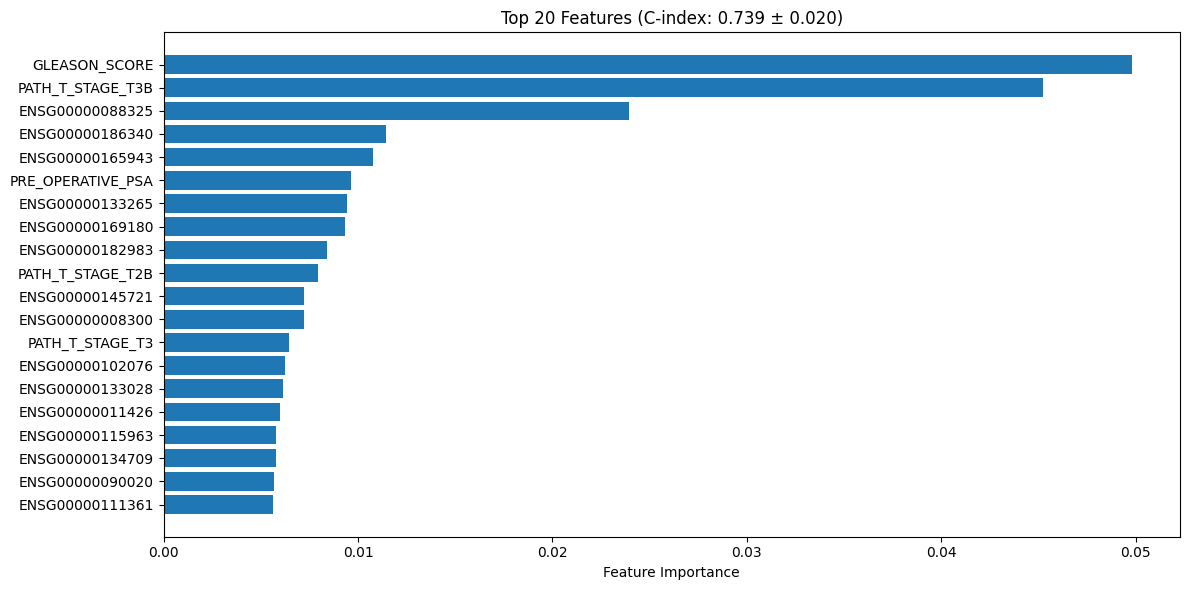


Overall C-index: 0.739 (±0.020)

Top 10 most important features:
GLEASON_SCORE        0.049791
PATH_T_STAGE_T3B     0.045226
ENSG00000088325      0.023948
ENSG00000186340      0.011415
ENSG00000165943      0.010764
PRE_OPERATIVE_PSA    0.009658
ENSG00000133265      0.009414
ENSG00000169180      0.009340
ENSG00000182983      0.008390
PATH_T_STAGE_T2B     0.007963
dtype: float64


In [6]:
class BatchAwareSurvivalModel:
    def __init__(self):
        self.scaler = StandardScaler()
        self.base_model = GradientBoostingSurvivalAnalysis(
            n_estimators=1000,
            learning_rate=0.05,
            max_depth=3
        )
        
    def _extract_batch_info(self, data):
        """Extrahiert Batch-Information aus den Index-Namen"""
        return data.index.map(lambda x: x.split('.')[0])
    
    def _center_within_batch(self, X, batch_ids):
        """Zentriert Features innerhalb jedes Batches"""
        X_centered = X.copy()
        for batch in np.unique(batch_ids):
            mask = batch_ids == batch
            X_centered.loc[mask] = self.scaler.fit_transform(X.loc[mask])
        return X_centered
    
    def fit(self, X, y):
        """
        X: Feature-Matrix (gene expression + clinical)
        y: Survival data (status, time)
        """
        # Batch-Information extrahieren
        batch_ids = self._extract_batch_info(X)
        
        # Batch-Korrektur durchführen
        X_corrected = self._center_within_batch(X, batch_ids)
        
        # Basis-Modell fitten
        self.base_model.fit(X_corrected, y)
        
    def predict(self, X):
        # Batch-Korrektur für Vorhersage
        batch_ids = self._extract_batch_info(X)
        X_corrected = self._center_within_batch(X, batch_ids)
        return self.base_model.predict(X_corrected)
    
    def get_feature_importance(self):
        return pd.Series(
            self.base_model.feature_importances_,
            index=self.base_model.feature_names_in_
        )

def evaluate_model_with_cv(X, y, n_splits=5):
    """Evaluiert das Modell mit Cross-Validation"""
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    c_indices = []
    
    for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
        # Daten für diesen Fold aufteilen
        X_train = X.iloc[train_idx]
        X_test = X.iloc[test_idx]
        y_train = y[train_idx]
        y_test = y[test_idx]
        
        # Modell trainieren und evaluieren
        model = BatchAwareSurvivalModel()
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        
        # C-Index berechnen
        c_index = concordance_index_censored(
            y_test['status'],
            y_test['time'],
            pred
        )[0]
        
        c_indices.append(c_index)
        print(f"Fold {fold+1} C-index: {c_index:.3f}")
    
    return np.mean(c_indices), np.std(c_indices)

def plot_results(feature_importance, c_index_mean, c_index_std):
    """Visualisiert die Ergebnisse"""
    plt.figure(figsize=(12, 6))
    
    # Top 20 wichtigste Features
    top_features = feature_importance.sort_values(ascending=True)[-20:]
    
    plt.barh(range(len(top_features)), top_features)
    plt.yticks(range(len(top_features)), top_features.index)
    plt.xlabel('Feature Importance')
    plt.title(f'Top 20 Features (C-index: {c_index_mean:.3f} ± {c_index_std:.3f})')
    plt.tight_layout()
    plt.show()

# Hauptausführung
def main():
    # Daten laden
    exprs = loader.common_genes_data['common_genes_knn_imputed.csv']
    pdata = loader.merged_pdata_imputed['merged_imputed_pData.csv']
    
    # Survival Array erstellen
    y = np.array([(status, time) for status, time in 
                  zip(pdata['BCR_STATUS'], pdata['MONTH_TO_BCR'])],
                 dtype=[('status', bool), ('time', float)])
    
    # Klinische Features vorbereiten
    clinical_features = ['GLEASON_SCORE', 'PATH_T_STAGE', 'PRE_OPERATIVE_PSA']
    clinical_data = pd.get_dummies(
        pdata[clinical_features], 
        columns=['PATH_T_STAGE']
    )
    
    # Genetische und klinische Daten kombinieren
    combined_features = pd.concat([exprs, clinical_data], axis=1)
    
    # Modell evaluieren
    c_index_mean, c_index_std = evaluate_model_with_cv(combined_features, y)
    
    # Finales Modell für Feature Importance
    final_model = BatchAwareSurvivalModel()
    final_model.fit(combined_features, y)
    feature_importance = final_model.get_feature_importance()
    
    # Ergebnisse plotten
    plot_results(feature_importance, c_index_mean, c_index_std)
    
    print(f"\nOverall C-index: {c_index_mean:.3f} (±{c_index_std:.3f})")
    print("\nTop 10 most important features:")
    print(feature_importance.sort_values(ascending=False).head(10))

if __name__ == "__main__":
    from preprocessing import DataLoader
    import os
    
    # DataLoader initialisieren
    base_path = os.path.dirname(os.getcwd())
    loader = DataLoader(base_path)
    loader.load_all_data()
    
    main()

### Ensemle mit RSF und Compontent wise GB 0,67
(Params noch nicht gefixed)

In [28]:


class SurvivalEnsemble:
    def __init__(self):
        # Initialisiere beide Modelle mit einfachen Parametern
        self.rsf = RandomSurvivalForest(
            n_estimators=1000,
            max_depth=4,
            n_jobs=-1,
            random_state=42,
            min_samples_split=5
        )
        
        self.cgb = ComponentwiseGradientBoostingSurvivalAnalysis(
            n_estimators=1000,
            learning_rate=0.01,
            random_state=42
        )
        
        self.scaler = StandardScaler()
        
    def fit(self, X, y):
        # Standardisiere Features
        X_scaled = pd.DataFrame(
            self.scaler.fit_transform(X),
            index=X.index,
            columns=X.columns
        )
        
        # Fitte beide Modelle
        self.rsf.fit(X_scaled, y)
        self.cgb.fit(X_scaled, y)
        
    def predict(self, X):
        # Standardisiere Features
        X_scaled = pd.DataFrame(
            self.scaler.transform(X),
            index=X.index,
            columns=X.columns
        )
        
        # Hole Vorhersagen
        pred_rsf = self.rsf.predict(X_scaled)
        pred_cgb = self.cgb.predict(X_scaled)
        
        # Kombiniere Vorhersagen (einfacher Durchschnitt)
        return (pred_rsf + pred_cgb) / 2

def evaluate_ensemble():
    # Daten laden
    exprs = loader.common_genes_data['common_genes_knn_imputed.csv']
    pdata = loader.merged_pdata_imputed['merged_imputed_pData.csv']
    
    # Survival Array erstellen
    y = np.array([(status, time) for status, time in 
                  zip(pdata['BCR_STATUS'], pdata['MONTH_TO_BCR'])],
                 dtype=[('status', bool), ('time', float)])
    
    # Klinische Features vorbereiten
    clinical_features = ['GLEASON_SCORE', 'PATH_T_STAGE', 'PRE_OPERATIVE_PSA']
    clinical_data = pd.get_dummies(
        pdata[clinical_features], 
        columns=['PATH_T_STAGE']
    )
    
    # Features kombinieren
    X = pd.concat([exprs, clinical_data], axis=1)
    
    # Cross-Validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    c_indices = []
    
    # Progress Tracking
    total_folds = 5
    
    for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
        print(f"\nStarting Fold {fold}/{total_folds} ({fold/total_folds*100:.1f}% complete)")
        
        # Split data
        X_train = X.iloc[train_idx]
        X_test = X.iloc[test_idx]
        y_train = y[train_idx]
        y_test = y[test_idx]
        
        # Train ensemble
        print("Training Random Survival Forest...")
        ensemble = SurvivalEnsemble()
        ensemble.fit(X_train, y_train)
        
        # Make predictions
        print("Making predictions...")
        pred = ensemble.predict(X_test)
        
        # Calculate c-index
        c_index = concordance_index_censored(
            y_test['status'],
            y_test['time'],
            pred
        )[0]
        
        c_indices.append(c_index)
        print(f"Fold {fold} C-index: {c_index:.3f}")
    
    # Final results
    mean_c_index = np.mean(c_indices)
    std_c_index = np.std(c_indices)
    
    print("\nFinal Results:")
    print(f"Mean C-index: {mean_c_index:.3f} (±{std_c_index:.3f})")
    print("Individual fold C-indices:", c_indices)
    
    return mean_c_index, std_c_index

if __name__ == "__main__":
    from preprocessing import DataLoader
    import os
    
    # DataLoader initialisieren
    base_path = os.path.dirname(os.getcwd())
    loader = DataLoader(base_path)
    loader.load_all_data()
    
    # Daten laden
    common_genes_data = loader.common_genes_data
    
    # Evaluation durchführen
    mean_c_index, std_c_index = evaluate_ensemble()


Starting Fold 1/5 (20.0% complete)
Training Random Survival Forest...
Making predictions...
Fold 1 C-index: 0.703

Starting Fold 2/5 (40.0% complete)
Training Random Survival Forest...
Making predictions...
Fold 2 C-index: 0.652

Starting Fold 3/5 (60.0% complete)
Training Random Survival Forest...
Making predictions...
Fold 3 C-index: 0.648

Starting Fold 4/5 (80.0% complete)
Training Random Survival Forest...
Making predictions...
Fold 4 C-index: 0.676

Starting Fold 5/5 (100.0% complete)
Training Random Survival Forest...
Making predictions...
Fold 5 C-index: 0.713

Final Results:
Mean C-index: 0.678 (±0.026)
Individual fold C-indices: [0.7027777777777777, 0.6516135284426785, 0.647536093544923, 0.6764827443686712, 0.7132027173377966]


#### Multi Task Learning


In [57]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader as TorchDataLoader
from torch.optim.lr_scheduler import OneCycleLR
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sksurv.metrics import concordance_index_censored

class DeepMTLSurvival(nn.Module):
    def __init__(self, clinical_dim, genomic_dim):
        super().__init__()
        
        # Clinical pathway
        self.clinical_net = nn.Sequential(
            nn.Linear(clinical_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2)
        )
        
        # Genomic pathway
        self.genomic_net = nn.Sequential(
            nn.Linear(genomic_dim, 512),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Dropout(0.2)
        )
        
        # Combined pathway
        self.combined_net = nn.Sequential(
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(64, 32),
            nn.ReLU()
        )
        
        # Output heads
        self.time_out = nn.Linear(16, 1)
        self.event_out = nn.Linear(16, 1)
        
    def forward(self, clinical, genomic):
        # Process clinical data
        clinical_features = self.clinical_net(clinical)
        
        # Process genomic data
        genomic_features = self.genomic_net(genomic)
        
        # Combine features
        combined = torch.cat([clinical_features, genomic_features], dim=1)
        shared_features = self.combined_net(combined)
        
        # Generate predictions
        time_pred = self.time_out(shared_features)
        event_pred = torch.sigmoid(self.event_out(shared_features))
        
        return time_pred, event_pred, clinical_features, genomic_features

class MTLSurvivalLoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.time_criterion = nn.MSELoss()
        self.event_criterion = nn.BCELoss()
        
    def forward(self, time_pred, event_pred, time_true, event_true, 
                time_pred_b=None, event_pred_b=None, 
                time_true_b=None, event_true_b=None, lam=1.0):
        if time_pred_b is None:  # No mixup
            time_loss = self.time_criterion(time_pred, time_true.view(-1, 1))
            event_loss = self.event_criterion(event_pred, event_true.view(-1, 1).float())
            return time_loss + event_loss
        else:  # Mixup
            time_loss = lam * self.time_criterion(time_pred, time_true.view(-1, 1)) + \
                       (1 - lam) * self.time_criterion(time_pred_b, time_true_b.view(-1, 1))
            event_loss = lam * self.event_criterion(event_pred, event_true.view(-1, 1).float()) + \
                        (1 - lam) * self.event_criterion(event_pred_b, event_true_b.view(-1, 1).float())
            return time_loss + event_loss

class SurvivalDataset(Dataset):
    def __init__(self, clinical_data, genomic_data, time, event):
        self.clinical_data = torch.FloatTensor(clinical_data)
        self.genomic_data = torch.FloatTensor(genomic_data)
        self.time = torch.FloatTensor(time)
        self.event = torch.FloatTensor(event)
        
    def __len__(self):
        return len(self.time)
    
    def __getitem__(self, idx):
        return {
            'clinical': self.clinical_data[idx],
            'genomic': self.genomic_data[idx],
            'time': self.time[idx],
            'event': self.event[idx]
        }

class DeepMTLSurvivalAnalysis:
    def __init__(self, clinical_dim, genomic_dim, device='cuda', **kwargs):
        self.device = torch.device(device if torch.cuda.is_available() else 'cpu')
        print(f"Using device: {self.device}")
        self.model = DeepMTLSurvival(clinical_dim, genomic_dim).to(self.device)
        self.criterion = MTLSurvivalLoss()
        self.optimizer = torch.optim.Adam(
            self.model.parameters(),
            lr=kwargs.get('lr', 0.001),
            weight_decay=kwargs.get('weight_decay', 1e-5)
        )
    
    def mixup_data(self, clinical, genomic, time, event, alpha=0.2):
        if alpha > 0:
            lam = np.random.beta(alpha, alpha)
        else:
            lam = 1

        batch_size = clinical.size()[0]
        index = torch.randperm(batch_size).to(self.device)

        mixed_clinical = lam * clinical + (1 - lam) * clinical[index]
        mixed_genomic = lam * genomic + (1 - lam) * genomic[index]
        
        return mixed_clinical, mixed_genomic, time, time[index], event, event[index], lam
        
    def fit(self, train_loader, val_loader=None, epochs=100):
        print("Starting training...")
        self.scheduler = OneCycleLR(
            self.optimizer,
            max_lr=0.001,
            epochs=epochs,
            steps_per_epoch=len(train_loader),
            pct_start=0.3
        )
        
        best_val_loss = float('inf')
        patience_counter = 0
        
        for epoch in range(epochs):
            self.model.train()
            train_loss = 0
            
            for batch_idx, batch in enumerate(train_loader):
                self.optimizer.zero_grad()
                
                clinical = batch['clinical'].to(self.device)
                genomic = batch['genomic'].to(self.device)
                time = batch['time'].to(self.device)
                event = batch['event'].to(self.device)
                
                if np.random.random() > 0.5:
                    (clinical_mixed, genomic_mixed, 
                     time_a, time_b, 
                     event_a, event_b, 
                     lam) = self.mixup_data(clinical, genomic, 
                                          time, event)
                    
                    time_pred_mixed, event_pred_mixed, _, _ = self.model(
                        clinical_mixed, genomic_mixed
                    )
                    
                    loss = self.criterion(
                        time_pred_mixed, event_pred_mixed,
                        time_a, event_a,
                        time_pred_mixed, event_pred_mixed,
                        time_b, event_b,
                        lam
                    )
                else:
                    time_pred, event_pred, _, _ = self.model(
                        clinical, genomic
                    )
                    
                    loss = self.criterion(time_pred, event_pred, time, event)
                
                loss.backward()
                
                torch.nn.utils.clip_grad_norm_(
                    self.model.parameters(), 
                    max_norm=1.0
                )
                
                self.optimizer.step()
                self.scheduler.step()
                
                train_loss += loss.item()
                
                if batch_idx % 10 == 0:
                    print(f'Epoch: {epoch+1}/{epochs}, Batch: {batch_idx}/{len(train_loader)}, '
                          f'Loss: {loss.item():.4f}')
            
            avg_train_loss = train_loss / len(train_loader)
            print(f'Epoch {epoch+1}/{epochs} - Average Training Loss: {avg_train_loss:.4f}')
            
            if val_loader is not None:
                val_loss = self.evaluate(val_loader)
                print(f'Validation Loss: {val_loss:.4f}')
                
                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    patience_counter = 0
                else:
                    patience_counter += 1
                
                if patience_counter >= 15:
                    print("Early stopping triggered")
                    break
                
    def predict(self, loader):
        print("Making predictions...")
        self.model.eval()
        time_preds = []
        event_preds = []
        
        with torch.no_grad():
            for batch in loader:
                clinical = batch['clinical'].to(self.device)
                genomic = batch['genomic'].to(self.device)
                
                time_pred, event_pred, _, _ = self.model(clinical, genomic)
                
                time_preds.append(time_pred.cpu())
                event_preds.append(event_pred.cpu())
        
        return (
            torch.cat(time_preds).numpy(),
            torch.cat(event_preds).numpy()
        )
    
    def evaluate(self, loader):
        self.model.eval()
        total_loss = 0
        
        with torch.no_grad():
            for batch in loader:
                clinical = batch['clinical'].to(self.device)
                genomic = batch['genomic'].to(self.device)
                time = batch['time'].to(self.device)
                event = batch['event'].to(self.device)
                
                time_pred, event_pred, _, _ = self.model(clinical, genomic)
                
                loss = self.criterion(time_pred, event_pred, time, event)
                total_loss += loss.item()
        
        return total_loss / len(loader)

def evaluate_mtl_survival(data_loader):
    print("Starting evaluation...")
    
    # Load data
    exprs = data_loader.common_genes_data['common_genes_knn_imputed.csv']
    pdata = data_loader.merged_pdata_imputed['merged_imputed_pData.csv']
    
    print(f"Data loaded - Expression shape: {exprs.shape}, Clinical shape: {pdata.shape}")
    
    clinical_features = ['GLEASON_SCORE', 'PATH_T_STAGE', 'PRE_OPERATIVE_PSA']
    clinical_data = pd.get_dummies(
        pdata[clinical_features], 
        columns=['PATH_T_STAGE']
    )
    
    print(f"Clinical features after one-hot encoding: {clinical_data.columns.tolist()}")
    
    clinical_scaler = StandardScaler()
    genomic_scaler = StandardScaler()
    
    X_clinical = clinical_scaler.fit_transform(clinical_data)
    X_genomic = genomic_scaler.fit_transform(exprs)
    
    time = pdata['MONTH_TO_BCR'].values
    event = pdata['BCR_STATUS'].values
    
    print(f"Data prepared - Clinical shape: {X_clinical.shape}, Genomic shape: {X_genomic.shape}")
    print(f"Time shape: {time.shape}, Event shape: {event.shape}")
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    c_indices = []
    
    for fold, (train_idx, test_idx) in enumerate(kf.split(X_clinical), 1):
        print(f"\nProcessing Fold {fold}/5")
        
        X_clinical_train = X_clinical[train_idx]
        X_clinical_test = X_clinical[test_idx]
        X_genomic_train = X_genomic[train_idx]
        X_genomic_test = X_genomic[test_idx]
        time_train = time[train_idx]
        time_test = time[test_idx]
        event_train = event[train_idx]
        event_test = event[test_idx]
        
        print(f"Training set sizes - Clinical: {X_clinical_train.shape}, Genomic: {X_genomic_train.shape}")
        print(f"Test set sizes - Clinical: {X_clinical_test.shape}, Genomic: {X_genomic_test.shape}")
        
        train_dataset = SurvivalDataset(
            X_clinical_train, X_genomic_train, 
            time_train, event_train
        )
        test_dataset = SurvivalDataset(
            X_clinical_test, X_genomic_test,
            time_test, event_test
        )
        
        train_loader = TorchDataLoader(
            train_dataset, 
            batch_size=64,
            shuffle=True,
            drop_last=True
        )
        test_loader = TorchDataLoader(
            test_dataset, 
            batch_size=64,
            shuffle=False
        )
        
        model = DeepMTLSurvivalAnalysis(
            clinical_dim=X_clinical.shape[1],
            genomic_dim=X_genomic.shape[1],
            lr=0.001,
            weight_decay=1e-5
        )
        
        print(f"\nTraining model for fold {fold}")
        model.fit(train_loader, epochs=100)
        
        print(f"\nMaking predictions for fold {fold}")
        time_pred, _ = model.predict(test_loader)
        
        c_index = concordance_index_censored(
            event_test.astype(bool),
            time_test,
            -time_pred.squeeze()
        )[0]
        
        c_indices.append(c_index)
        print(f"Fold {fold} C-index: {c_index:.3f}")
    
    print("\nFinal Results:")
    print(f"Mean C-index: {np.mean(c_indices):.3f} (±{np.std(c_indices):.3f})")
    print("Individual fold C-indices:", c_indices)
    
    return np.mean(c_indices), np.std(c_indices)

if __name__ == "__main__":
    from preprocessing import DataLoader
    import os
    
    print("Starting program...")
    base_path = os.path.dirname(os.getcwd())
    print(f"Base path: {base_path}")
    
    loader = DataLoader(base_path)
    print("DataLoader initialized")
    
    loader.load_all_data()
    print("All data loaded")
    
    mean_c_index, std_c_index = evaluate_mtl_survival(loader)
    print(f"\nFinal Results:")
    print(f"Mean C-index: {mean_c_index:.3f} (±{std_c_index:.3f})")

Starting program...
Base path: /Users/jonasschernich/Library/Mobile Documents/com~apple~CloudDocs/Uni/Master/9. Semester/Consulting/Code
DataLoader initialized
All data loaded
Starting evaluation...
Data loaded - Expression shape: (1091, 15495), Clinical shape: (1091, 12)
Clinical features after one-hot encoding: ['GLEASON_SCORE', 'PRE_OPERATIVE_PSA', 'PATH_T_STAGE_T0', 'PATH_T_STAGE_T1C', 'PATH_T_STAGE_T2', 'PATH_T_STAGE_T2A', 'PATH_T_STAGE_T2B', 'PATH_T_STAGE_T2C', 'PATH_T_STAGE_T2X', 'PATH_T_STAGE_T3', 'PATH_T_STAGE_T3A', 'PATH_T_STAGE_T3B', 'PATH_T_STAGE_T3C', 'PATH_T_STAGE_T4', 'PATH_T_STAGE_T4X', 'PATH_T_STAGE_TX']
Data prepared - Clinical shape: (1091, 16), Genomic shape: (1091, 15495)
Time shape: (1091,), Event shape: (1091,)

Processing Fold 1/5
Training set sizes - Clinical: (872, 16), Genomic: (872, 15495)
Test set sizes - Clinical: (219, 16), Genomic: (219, 15495)
Using device: cpu

Training model for fold 1
Starting training...


RuntimeError: mat1 and mat2 shapes cannot be multiplied (64x32 and 16x1)